# Gráficos y mapas en Python con `geopandas` y `matplotlib` 

En este práctico, aprenderemos cómo cargar, manipular y visualizar datos espaciales. En algunos sentidos, los datos espaciales se han vuelto tan omnipresentes que hoy en día, por lo general, se incluyen simplemente como "una columna más" en una tabla. Sin embargo, el espacio es especial a veces y hay pocos aspectos en los que los datos geográficos difieren de las tablas numéricas estándar. En esta sesión, ampliaremos las habilidades desarrolladas en el anterior sobre datos no espaciales, y los combinaremos. En el proceso, descubriremos que, aunque con algunas particularidades, tratar con datos espaciales en Python se asemeja en gran medida a tratar con datos no espaciales. Por ejemplo, en esta práctica de laboratorio aprenderá a hacer mapas pulidos como este con solo unos pocos comandos:

![AYUDA](../img/plot.png)

La biblioteca principal empleada para todo esto es `geopandas`, que es una extensión geoespacial de la biblioteca de `pandas`, ya presentada en la clase anterior. `geopandas` admite exactamente la misma funcionalidad que `pandas` (de hecho, ya que está construida encima, por lo que la mayoría de los objetos subyacentes son de `pandas`), más una amplia gama de contrapartes espaciales que hacen manipulación general de datos espaciales tan fácil como tablas no-espaciales. Como las muñecas rusas, `geopandas` es una muñeca rusa que adentro contiene `pandas`.

![pandas y geopandas](https://images-na.ssl-images-amazon.com/images/I/71GnlJP8gVL._SX425_.jpg)

In [1]:
#df.plot.hexbin(x='coord_x',
#                     y='coord_y',
#                     C='observations',
#                     reduce_C_function=np.sum,
#                     gridsize=10,
#                     cmap="viridis")

In [2]:
#hacer lrs con los subtes, poner las estaciones en orden, calcular la distancia entre estaciones y visualizar

In [3]:
# explicar que esta tabla es igual a la que veniamos viendo, pero con un nuevo tipo, goemetyr que adentro es shapely

In [4]:
#tratar el tema de lartitud longitude como separado y graficar con eso

In [5]:
#ahi ver tema proyecciones

In [6]:
#importamos las librerías que veníamos trabajando 
import pandas as pd
import numpy as np

#y sumamos la que va a coronar la triada
import geopandas as gpd

## 1- GeoPandas, DataFrames como los de `Pandas`, pero Geo

In [7]:
#abrimos nuestro dataset espacial a aprtir de un archivo en el formato mas tradicional: ESRI shapefile 
estaciones = gpd.read_file('../carto/estaciones_de_subte.shp')
estaciones.head()

,ID,ESTACION,LINEA,geometry
0,1.0,CASEROS,H,POINT (105902.3513636972 99279.28209795424)
1,2.0,INCLAN,H,POINT (105715.5543212891 99986.54907226562)
2,3.0,HUMBERTO 1°,H,POINT (105591.8884887695 100683.6583251953)
3,4.0,VENEZUELA,H,POINT (105371.4735107422 101554.6354980469)
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (105252.2113037109 102254.3510742188)


In [8]:
#es muy siliar a pandas dataframe. vemos su tipo y vemos que es una especia de data frame
type(estaciones)

geopandas.geodataframe.GeoDataFrame

In [9]:
#tiene las mismas propiedades
estaciones.shape

(86, 4)

In [10]:
#info
estaciones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
ID          86 non-null float64
ESTACION    86 non-null object
LINEA       86 non-null object
geometry    86 non-null object
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [11]:
#se indexa por fila
estaciones.index

RangeIndex(start=0, stop=86, step=1)

In [12]:
#tambien por columnas
estaciones.columns

Index(['ID', 'ESTACION', 'LINEA', 'geometry'], dtype='object')

En las columnas vemos ya el elemento que hace a este *data frame* algo diferente a los de `pandas`: el campo **geometry** 

In [13]:
estaciones.geometry.head()

0    POINT (105902.3513636972 99279.28209795424)
1    POINT (105715.5543212891 99986.54907226562)
2    POINT (105591.8884887695 100683.6583251953)
3    POINT (105371.4735107422 101554.6354980469)
4    POINT (105252.2113037109 102254.3510742188)
Name: geometry, dtype: object

In [14]:
#Pero a pesar de ser el elemento que diferencia un DataFrame de un GeoDataFrame, guarda similitud con un objeto conocido de Pandas
#, geometry es una geoseries, similar a una series de pandas. 
type(estaciones.geometry)

geopandas.geoseries.GeoSeries

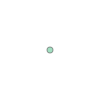

In [15]:
#es una geoSerie de que? que elementos la componen? que muñeca rusa m{as pequeña hay dentro?
estaciones.geometry.iloc[0]

In [16]:
print(estaciones.geometry.iloc[0])

POINT (105902.3513636972 99279.28209795424)


In [17]:
#es un objeto Shapely, para adentrarse mas en la madriguera del conejo, ver la disgresión sobre Shapely al final del notebook
type(estaciones.geometry.iloc[0])

shapely.geometry.point.Point

## 2- Coordenadas

En lo fundamental los GeoDatos, no dejan de ser los datos que trabajamos cotidianamente, pero con alguna referencia a su ubicación en el espacio, que creemos relevante por lo cual la introducimos en el análisis. Esa referencia al espacio debe corporizarse en algun tipo de objeto geografico, de los cuales utilizaremos 3 básicos:
* Punto
* Línea
* Polígono

En nuestro ejemplo, la estaciones de subte son puntos. El elemento geográfico más sencillo. En la geometría euclidiana, o de dos dimensiones, un punto se define por dos valores:

In [18]:
#un punto son dos coordenadas en el espacio
estaciones.geometry.iloc[0].x

105902.35136369725

In [19]:
estaciones.geometry.iloc[0].y

99279.28209795424

Tiene x y y, coordenadas en el eje cartesiano. Ojo que lo que siempre en matematica se llama x y y en ese orden, en geografia siempre se llamo latlong, pero x es long y y es lat. El orden cambia!
![latlong](../img/xy_latlong.jfif)

Pero es algo diferente a lo que siempre conocimos como latlong. En general estamos acostumbrados en mapas de Buenos Aires a ver valores como -34 y -58. La diferencia se explica por la llamada **proyeccion de coordenadas** que da cuenta de la transformación de un objeto en 3 dimensiones (como el planeta Tierra) en un plano de 2 dimensiones (el mapa). Esta proytección también regula las unidades de medidas de los ejes donde proyectamos. Puede estar en grados o en metros.


In [20]:
#con el metodo o funcion crs vemos la proyeccion de nuestro objeto
estaciones.crs

{'proj': 'tmerc',
 'lat_0': -34.6297166,
 'lon_0': -58.4627,
 'k': 0.999998,
 'x_0': 100000,
 'y_0': 100000,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [21]:
#cambiamos al formato tradicional de latlong
estaciones = estaciones.to_crs(epsg = 4326)
estaciones.head()

,ID,ESTACION,LINEA,geometry
0,1.0,CASEROS,H,POINT (-58.39833005827354 -34.63619629114226)
1,2.0,INCLAN,H,POINT (-58.40037199947714 -34.62982192437689)
2,3.0,HUMBERTO 1°,H,POINT (-58.40172516912597 -34.62353873781329)
3,4.0,VENEZUELA,H,POINT (-58.40413412280196 -34.61568876109078)
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-58.40543878453062 -34.60938200117359)


In [22]:
print(estaciones.geometry.iloc[0])

POINT (-58.39833005827354 -34.63619629114226)


Ya podemos ver que las coordenadas de nuestros puntos se asemejan a los valores que intuitivamente conocíamos para Buenos Aires
![latlong2](../img/latlong.png)

A partir de este momento, intentaremos visualizar todos los procesos que realizamos en un mapa. Para esto necesitamos la librería de Python que administra los gráficos: `matplotlib` 

In [23]:
#y sumamos la libreria que nos permite visualizar co alias plt
import matplotlib.pyplot as plt
#esta linea nos permite visualizar los plots y mapas dentro de nuestros notebooks
%matplotlib inline

En este curso haremos un uso muy utilitario de matplotlib. Es decir, presenaremos sus elementos fundamentales sin profundizar demasiado. Es una herramienta muy versatil y pontente. También mencionaremos las otras mas populares como `seaborn` y `plotly`. 

`Matplotlib` se construye fundamentalmente a partir de una **figura** que puede tener dentro uno o mas **ejes** (o *axis*)

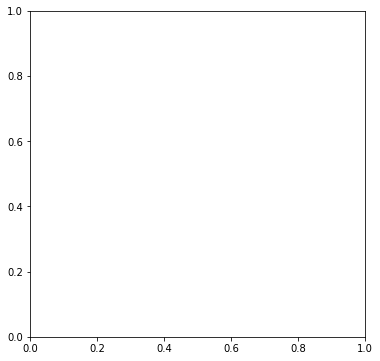

In [24]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

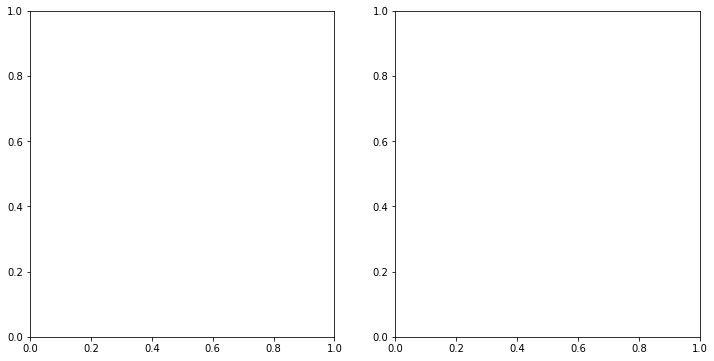

In [25]:
#agrando el tamaño de la figura
fig = plt.figure(figsize=(12,6))
#en 1 columna agrego 2 pares de ejes 
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


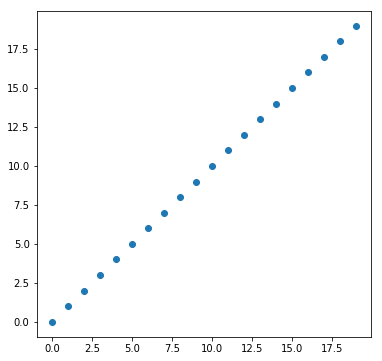

In [26]:
#puedo agregar contenido a los graficos al graficar algunos datos
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
x = range(20)
y = range(20)
ax.scatter(x,y)

In [27]:
#utilizando el metodo map, puedo extraer para cada punto sus coordenadas en x
estaciones['x'] = estaciones.geometry.map(lambda coord: coord.x)
estaciones.head()

,ID,ESTACION,LINEA,geometry,x
0,1.0,CASEROS,H,POINT (-58.39833005827354 -34.63619629114226),-58.398330
1,2.0,INCLAN,H,POINT (-58.40037199947714 -34.62982192437689),-58.400372
2,3.0,HUMBERTO 1°,H,POINT (-58.40172516912597 -34.62353873781329),-58.401725
3,4.0,VENEZUELA,H,POINT (-58.40413412280196 -34.61568876109078),-58.404134
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-58.40543878453062 -34.60938200117359),-58.405439


Afortunadamente, los desarolladors de GeoPandas entendieron que esto es una tarea cotidiana y pusieron como metodo propio de las geoSeries extraer las coordenadas

In [28]:
estaciones['y'] = estaciones.geometry.y
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,y
0,1.0,CASEROS,H,POINT (-58.39833005827354 -34.63619629114226),-58.398330,-34.636196
1,2.0,INCLAN,H,POINT (-58.40037199947714 -34.62982192437689),-58.400372,-34.629822
2,3.0,HUMBERTO 1°,H,POINT (-58.40172516912597 -34.62353873781329),-58.401725,-34.623539
3,4.0,VENEZUELA,H,POINT (-58.40413412280196 -34.61568876109078),-58.404134,-34.615689
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-58.40543878453062 -34.60938200117359),-58.405439,-34.609382


Utilizando estas coordenadas podemos visualizar la ubicacion de nuestras estaciones en un mapa, visualizandolas sobre el eje de coordenadas utilizando su posicion en x y en y

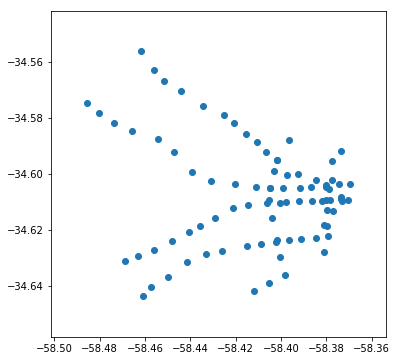

In [29]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(estaciones.x,estaciones.y)

Afortunadamente los desarrolladores de GeoPandas tambien pensaron que esta tarea debía poder resolverse de manera más sencilla:

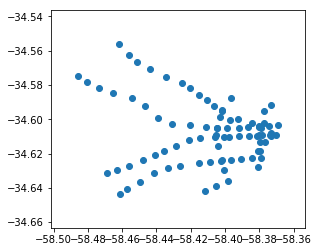

In [30]:
#al igual que los DataFrames de Pandas, los GeoDataFrames tienen un método (o función) plot que visualiza los objetos espaciales. 
estaciones.plot()

## 3 - Procesos de pandas en `geopandas`

In [31]:
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,y
0,1.0,CASEROS,H,POINT (-58.39833005827354 -34.63619629114226),-58.398330,-34.636196
1,2.0,INCLAN,H,POINT (-58.40037199947714 -34.62982192437689),-58.400372,-34.629822
2,3.0,HUMBERTO 1°,H,POINT (-58.40172516912597 -34.62353873781329),-58.401725,-34.623539
3,4.0,VENEZUELA,H,POINT (-58.40413412280196 -34.61568876109078),-58.404134,-34.615689
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-58.40543878453062 -34.60938200117359),-58.405439,-34.609382


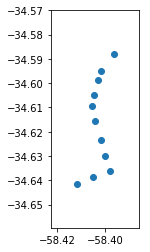

In [32]:
#podemos seleccionar
estaciones.loc[estaciones.LINEA=='H',:].plot()

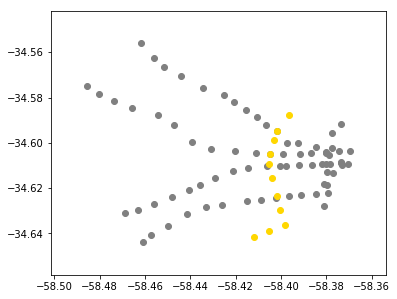

In [33]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
estaciones.loc[estaciones.LINEA!='H',:].plot(ax=ax,color='grey')
estaciones.loc[estaciones.LINEA=='H',:].plot(ax=ax,color='gold')

(-58.50146424626045,
 -58.35365442301726,
 -34.658259560906295,
 -34.541588867405785)

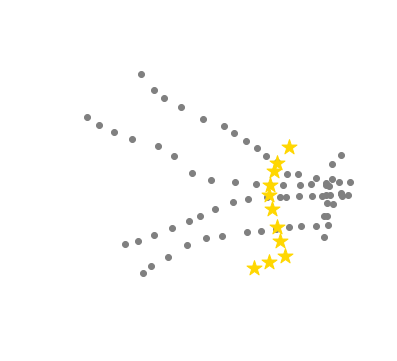

In [34]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
estaciones.loc[estaciones.LINEA!='H',:].plot(ax=ax,color='grey')
estaciones.loc[estaciones.LINEA=='H',:].plot(ax=ax,color='gold',marker='*', markersize=250)

#eliminamos los ejes
ax.set_axis_off()
# Forzamos un mismo rango de valors a los ejes para una vision mas "cuadrada" del mapa
plt.axis('equal')

Pero lo mejor es poder realizar procesos espaciales. Por ejemplo, podemos ver utilizar una harramienta de análisis básica y fundamental del análisis espacial para los objetos de tipo punto: la distancia euclidiana.

$$\sqrt[2]{(x_d - x_o)^{2}+(y_d - y_o)^{2}}$$

In [35]:
import math
constitucion = estaciones.loc[estaciones.ESTACION == 'CONSTITUCION',:]
retiro = estaciones.loc[estaciones.ESTACION == 'RETIRO',:]
math.sqrt((retiro.x.iloc[0] - constitucion.x.iloc[0])**2 + (retiro.y.iloc[0] - constitucion.y.iloc[0])**2)

0.037172056858999235

Afortunadamente esto no es algo que tenemos que hacer cada vez. `Geopandas` y `Shapely` lo resuelven por nosotros

In [36]:
#primero seleccionemos nuestras dos estaciones
constitucion = estaciones.loc[estaciones.ESTACION == 'CONSTITUCION','geometry'].iloc[0]
retiro = estaciones.loc[estaciones.ESTACION == 'RETIRO','geometry'].iloc[0]

In [37]:
constitucion.distance(retiro)

0.037172056858999235

Veamos algunas cosas que acaban de suceder. En primer lugar que significa 0.03? En que unidades de medidas se encuentra? Esto depende de la proyeccion de coordenadas que utilizamos

In [38]:
estaciones.crs

{'init': 'epsg:4326', 'no_defs': True}

La proyeccion de este GeoDataFrame está en [EPSG 4326](https://epsg.io/4326) cuya unidad de medida es grados. Hay muchas proyecciones que utilizan metros. Como la proyeción óptima depende de la ubicación en el planeta donde hagamos nuestro análisis, podemos utilizar una sencilla de alcance global como la [EPSG 3857](https://epsg.io/3857)

In [39]:
#vemos que podemos pasar nuestra estacion a epsg:3857.   
constitucion = estaciones.loc[estaciones.ESTACION == 'CONSTITUCION','geometry'].to_crs(epsg=3857).iloc[0].wkt
constitucion

'POINT (-6498925.114720983 -4113450.925310913)'

Sin embargo, hay dos métodos que puede ser util comprender como estan funcionando. 
* `iloc`
* `wkt`

Veamos que sucede si no utilizamos `iloc`

In [40]:
#a priori observamos que hay un numero al lado, lo que indica que tiene un indice y por ende sea probablementa Serie
constitucion = estaciones.loc[estaciones.ESTACION == 'CONSTITUCION','geometry']
constitucion

18    POINT (-58.38083760902074 -34.628065663639)
Name: geometry, dtype: object

In [41]:
type(constitucion)

geopandas.geoseries.GeoSeries

El problema con calcular distancias, es que siempre una distancia es de un punto a otro. Si utilizamos una serie, la misma puede tener 2, 3 o *n* elementos. Por eso tenemos que partir siempre de un punto y no de una serie. Eso hace el `iloc[0]`, toma el primer (y único) elemento de la serie. 

In [42]:
constitucion = estaciones.loc[estaciones.ESTACION == 'CONSTITUCION','geometry'].iloc[0]
type(constitucion)

shapely.geometry.point.Point

Ahora podemos ver que el tipo es un `Shapely` **Point**. Hemos llegado a la muñeca rusa más pequeña (al menos la más pequeña que veremos en este taller, donde no llegamos al transistor, el bit y los 1 y 0).

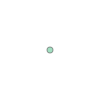

In [43]:
constitucion

Como estamos utilizando notebooks, los objetos geograficos son visualizados por defecto. Por eso si queremos ver su contenido podemos hacer dos cosas

In [44]:
print(constitucion)

POINT (-58.38083760902074 -34.628065663639)


In [45]:
constitucion.wkt

'POINT (-58.38083760902074 -34.628065663639)'

Uno simplemente imprime en pantalla el otro convierne al objeto **Point** en una cadena de texto

In [46]:
type(constitucion.wkt)

str

De hecho, veamos que la función `disatnce()` pertenece al objeto **Point**, no a Python básico, Pandas o Geopandas. Es propia de **Point**

In [47]:
from shapely.geometry import Point
help(Point.distance)

Help on function distance in module shapely.geometry.base:

distance(self, other)
    Unitless distance to other geometry (float)



Pero ademas noten que al elegir solo la columna **geometry**, no usamos []. Si lo hubiesemos hecho, hubiesemos obtenido una Serie y deberiamos haberlo repetido dos veces 

In [48]:
constitucion = estaciones.loc[estaciones.ESTACION == 'CONSTITUCION',['geometry']].iloc[0]
type(constitucion)


pandas.core.series.Series

In [49]:
#dos veces iloc[0]
constitucion = estaciones.loc[estaciones.ESTACION == 'CONSTITUCION',['geometry']].iloc[0].iloc[0]

type(constitucion)


shapely.geometry.point.Point

In [50]:
#noten que al filtrar las filas, usamos una serie
type(estaciones.ESTACION == 'CONSTITUCION')

pandas.core.series.Series

Ahora si ya comprendemos que tenemos que calcular la distancia entre dos puntos, y para eso debemos urgar dentro de la muñeca de `GeoPandas` **DataFrame**, dentro de la **GeoSeries** geometry hasta el **Punto** de `Shapely`.

In [51]:
constitucion = estaciones.loc[estaciones.ESTACION == 'CONSTITUCION','geometry'].to_crs(epsg=3857).iloc[0]
retiro = estaciones.loc[estaciones.ESTACION == 'RETIRO','geometry'].to_crs(epsg=3857).iloc[0]
constitucion.distance(retiro)

4995.29883754073

Sin embargo, recordemos que el concepto de proyección de coordenadas es propio de `GeoPandas`, no de `Shapely`. Podemos convertir todo un **GeoDataFrame** o una **Series**, pero no un **Punto**

In [52]:
estaciones.to_crs(epsg=3857).head()

,ID,ESTACION,LINEA,geometry,x,y
0,1.0,CASEROS,H,POINT (-6500872.365264534 -4114550.922561814),-58.398330,-34.636196
1,2.0,INCLAN,H,POINT (-6501099.673119548 -4113688.521703297),-58.400372,-34.629822
2,3.0,HUMBERTO 1°,H,POINT (-6501250.307275812 -4112838.521641664),-58.401725,-34.623539
3,4.0,VENEZUELA,H,POINT (-6501518.470772369 -4111776.653996726),-58.404134,-34.615689
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-6501663.705051661 -4110923.61029132),-58.405439,-34.609382


In [53]:
estaciones.geometry.to_crs(epsg=3857).head()

0    POINT (-6500872.365264534 -4114550.922561814)
1    POINT (-6501099.673119548 -4113688.521703297)
2    POINT (-6501250.307275812 -4112838.521641664)
3    POINT (-6501518.470772369 -4111776.653996726)
4     POINT (-6501663.705051661 -4110923.61029132)
Name: geometry, dtype: object

In [54]:
estaciones.geometry.iloc[0].to_crs(epsg=3857)

AttributeError: 'Point' object has no attribute 'to_crs'

Por eso siempre que utilicemos procesos espaciales, debemos comprender conceptualmente si ese método se aplica a un punto, a un conjunto de puntos, etc. Una distancia es siempre de punto a punto. Pero podríamos querer obtener una distancia de todas las estaciones a un punto, por ejemplo el Obelisco.

In [55]:
#convertirmos todo nuestro dataset 
estaciones = estaciones.to_crs(epsg=3857)

In [56]:
obelisco = Point(-6499048.3,-4110245.4)

In [57]:
#una forma es mapear
estaciones['distancia'] = estaciones.geometry.map(lambda x: x.distance(obelisco))
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,y,distancia
0,1.0,CASEROS,H,POINT (-6500872.365264534 -4114550.922561814),-58.398330,-34.636196,4675.974617
1,2.0,INCLAN,H,POINT (-6501099.673119548 -4113688.521703297),-58.400372,-34.629822,4007.894552
2,3.0,HUMBERTO 1°,H,POINT (-6501250.307275812 -4112838.521641664),-58.401725,-34.623539,3401.928261
3,4.0,VENEZUELA,H,POINT (-6501518.470772369 -4111776.653996726),-58.404134,-34.615689,2906.283270
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-6501663.705051661 -4110923.61029132),-58.405439,-34.609382,2701.909100


In [58]:
#pero afortunadamente GeoPandas puede aplicar este metodo a toda la Serie
estaciones['distancia'] = estaciones.geometry.distance(obelisco)
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,y,distancia
0,1.0,CASEROS,H,POINT (-6500872.365264534 -4114550.922561814),-58.398330,-34.636196,4675.974617
1,2.0,INCLAN,H,POINT (-6501099.673119548 -4113688.521703297),-58.400372,-34.629822,4007.894552
2,3.0,HUMBERTO 1°,H,POINT (-6501250.307275812 -4112838.521641664),-58.401725,-34.623539,3401.928261
3,4.0,VENEZUELA,H,POINT (-6501518.470772369 -4111776.653996726),-58.404134,-34.615689,2906.283270
4,5.0,ONCE - 30 DE DICIEMBRE,H,POINT (-6501663.705051661 -4110923.61029132),-58.405439,-34.609382,2701.909100


Text(0.5,1,'Estaciones de subte y distancia al Obelisco')

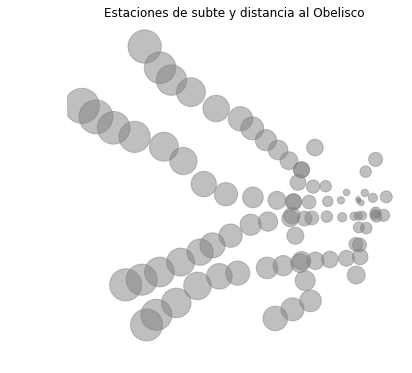

In [59]:
#veamoslo en un mapa
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
estaciones.plot(ax=ax,color='grey',markersize=(estaciones.distancia/10),alpha=0.5) 
ax.set_axis_off()
plt.axis('equal')
ax.set_title('Estaciones de subte y distancia al Obelisco')

Ahora podemos tratar con el siguiente objeto geografico en terminos de complejidad. La linea 

In [60]:
#noten como usamos el indice para seleccionar lineas más faciles
lineas = gpd.read_file('../carto/lineas_de_subte.shp')
lineas.index = lineas.Linea
lineas = lineas.drop(['id','Linea'],axis=1)
lineas = lineas.to_crs(epsg=3857)
lineas

,geometry
Linea,
A,LINESTRING (-6508823.621983094 -4113790.557363...
B,LINESTRING (-6510694.212720125 -4106170.107942...
C,LINESTRING (-6498989.02483825 -4113351.3454824...
D,LINESTRING (-6507956.484830616 -4103697.440260...
E,LINESTRING (-6507956.399287493 -4115533.052444...
H,LINESTRING (-6502456.806748704 -4115214.826158...


In [61]:
#vemos que el tipo para linea de shapely es LineString
#noten que al usar el indice sin listas, nos devuelve el objeto geometry sin necesidad de iloc[0]
H = lineas.loc['H','geometry']
type(H)

shapely.geometry.linestring.LineString

In [62]:
#tiene sus propios metodos especificos a la linea
H.length

8468.993329266123

In [63]:
H.coords

In [64]:
#una linea no es más que una secuencia de puntos
H.coords[0],H.coords[1]

((-6502456.806748704, -4115214.8261582623),
 (-6500959.194922459, -4114441.7362974873))

In [65]:
estaciones_H = estaciones.loc[estaciones.LINEA == 'H',['ESTACION','geometry']]
estaciones_H

,ESTACION,geometry
0,CASEROS,POINT (-6500872.365264534 -4114550.922561814)
1,INCLAN,POINT (-6501099.673119548 -4113688.521703297)
2,HUMBERTO 1°,POINT (-6501250.307275812 -4112838.521641664)
3,VENEZUELA,POINT (-6501518.470772369 -4111776.653996726)
4,ONCE - 30 DE DICIEMBRE,POINT (-6501663.705051661 -4110923.61029132)
76,CORRIENTES,POINT (-6501598.471925394 -4110322.432566255)
77,PARQUE PATRICIOS,POINT (-6501636.792732302 -4114910.248023052)
78,HOSPITALES,POINT (-6502370.395089394 -4115297.61242881)
83,CÓRDOBA,POINT (-6501406.0311146 -4109506.256469619)
84,LAS HERAS,POINT (-6500681.830667321 -4108019.654066862)


In [66]:
estaciones_H['orden'] = estaciones_H.geometry.map(lambda estacion: H.project(estacion,normalized = True))

In [67]:
estaciones_H = estaciones_H.sort_values(by='orden')
estaciones_H = estaciones_H.reset_index(drop=True)
estaciones_H

,ESTACION,geometry,orden
0,HOSPITALES,POINT (-6502370.395089394 -4115297.61242881),0.004583
1,PARQUE PATRICIOS,POINT (-6501636.792732302 -4114910.248023052),0.102535
2,CASEROS,POINT (-6500872.365264534 -4114550.922561814),0.199006
3,INCLAN,POINT (-6501099.673119548 -4113688.521703297),0.289459
4,HUMBERTO 1°,POINT (-6501250.307275812 -4112838.521641664),0.391346
5,VENEZUELA,POINT (-6501518.470772369 -4111776.653996726),0.520547
6,ONCE - 30 DE DICIEMBRE,POINT (-6501663.705051661 -4110923.61029132),0.622656
7,CORRIENTES,POINT (-6501598.471925394 -4110322.432566255),0.695686
8,CÓRDOBA,POINT (-6501406.0311146 -4109506.256469619),0.794333
9,SANTA FE - CARLOS JAUREGUI,POINT (-6501256.279262598 -4108974.83962486),0.859465


In [68]:
#no siempre tenemos que guardar todo en el data frame, en especial variables que van a ser insumo
estacion_siguiente = estaciones_H.geometry.shift(-1)

In [69]:
distancias = [estaciones_H.geometry.loc[i].distance(estacion_siguiente.loc[i]) for i in estaciones_H.index[:-1]]

In [70]:
from shapely.geometry import LineString


In [71]:
lineas_nuevas = [LineString([estaciones_H.geometry.loc[i],estacion_siguiente.loc[i]]) for i in estaciones_H.index[:-1]]
lineas_nuevas

In [72]:
nuevaH = pd.DataFrame({'lineas':lineas_nuevas,
             'distancia':distancias})
type(nuevaH)

pandas.core.frame.DataFrame

In [73]:
nuevaH = gpd.GeoDataFrame(nuevaH, geometry='lineas',crs={'init' :'epsg:3857'})


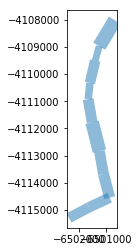

In [74]:
nuevaH.plot(linewidth = nuevaH.distancia/80,alpha = 0.5)

In [75]:
lineas

,geometry
Linea,
A,LINESTRING (-6508823.621983094 -4113790.557363...
B,LINESTRING (-6510694.212720125 -4106170.107942...
C,LINESTRING (-6498989.02483825 -4113351.3454824...
D,LINESTRING (-6507956.484830616 -4103697.440260...
E,LINESTRING (-6507956.399287493 -4115533.052444...
H,LINESTRING (-6502456.806748704 -4115214.826158...


In [76]:
def funcion(dt):
    dt = dt.reindex(columns = ['ESTACION','LINEA','geometry'])
    dt = dt.iloc[0]
    return dt

In [77]:
estaciones.groupby('LINEA').apply(funcion).reset_index(drop=True)

,ESTACION,LINEA,geometry
0,PERU,A,POINT (-6498127.365036696 -4110872.712542146)
1,FLORIDA,B,POINT (-6498216.843629339 -4110161.079893423)
2,RETIRO,C,POINT (-6498099.604554965 -4108524.30949048)
3,9 DE JULIO,D,POINT (-6498829.391967968 -4110289.281761676)
4,BOLIVAR,E,POINT (-6498062.411708559 -4110965.13615367)
5,CASEROS,H,POINT (-6500872.365264534 -4114550.922561814)


In [78]:
def distancia_entre_estaciones(dt,lineas):
    #obtengo la linea de cada subset de datos
    linea = dt.LINEA.unique()[0]
    colores = {
        'A':'lightblue',
        'B':'red',
        'C':'blue',
        'D':'green',
        'E':'purple',
        'H':'gold'
    }
    color = colores[linea]
    
    linea = lineas.loc[linea,'geometry']
    dt = dt.reindex(columns = ['ESTACION','LINEA','geometry'])
    dt['orden'] = dt.geometry.map(lambda estacion: linea.project(estacion,normalized = True))
    
    dt = dt.sort_values(by='orden')
    dt = dt.reset_index(drop=True)
    estacion_siguiente = dt.geometry.shift(-1)
    
    distancias = [dt.geometry.loc[i].distance(estacion_siguiente.loc[i]) for i in dt.index[:-1]]
    lineas_nuevas = [LineString([dt.geometry.loc[i],estacion_siguiente.loc[i]]) for i in dt.index[:-1]]
    nuevo_dt = pd.DataFrame({'lineas':lineas_nuevas,
             'distancia':distancias})
    nuevo_dt = gpd.GeoDataFrame(nuevo_dt, geometry='lineas',crs={'init' :'epsg:3857'})
    #nuevo_dt.geometry = nuevo_dt.geometry.buffer(0.9)
    nuevo_dt['color'] = color
    return nuevo_dt

In [79]:
lineas_subte = estaciones.groupby('LINEA').apply(lambda x: distancia_entre_estaciones(x,lineas))
lineas_subte.index = lineas_subte.index.droplevel(1)



Text(0.5,1,'Distancia entre estaciones de Subte')

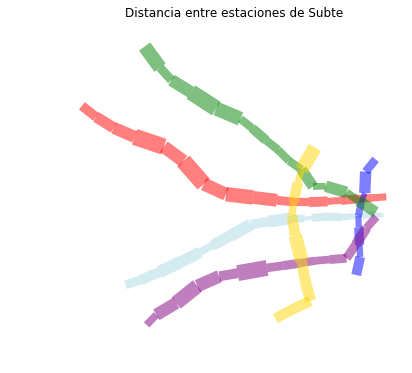

In [80]:
#veamoslo en un mapa
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

lineas_subte.plot(color = lineas_subte.color,
                  linewidth = lineas_subte.distancia/80,
                  alpha = 0.5,ax=ax)
ax.set_axis_off()
plt.axis('equal')
ax.set_title('Distancia entre estaciones de Subte')

In [81]:
lineas_subte['lineas'] = lineas_subte.apply(lambda x: x.lineas.buffer(x.distancia/10), axis=1)

Text(0.5,1,'Distancia entre estaciones de Subte')

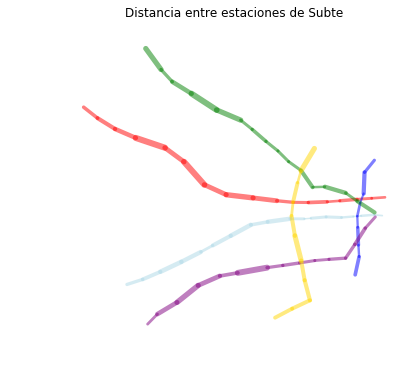

In [82]:
#veamoslo en un mapa
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

lineas_subte.plot(color = lineas_subte.color,
                  #linewidth = lineas_subte.distancia/80,
                  alpha = 0.5,ax=ax)
ax.set_axis_off()
plt.axis('equal')
ax.set_title('Distancia entre estaciones de Subte')

In [83]:
#COMO CREAMOS UN GEODATAFRAME?
from shapely import wkt
lineas = pd.read_csv('../carto/lineas-de-subte.csv')
lineas.WKT = lineas.WKT.apply(wkt.loads)
crs = {'init' :'epsg:4326'}
gdf = gpd.GeoDataFrame(lineas, geometry='WKT',crs=crs)
gdf.head()

,WKT,id,lineasub
0,LINESTRING (-58.45212560312952 -34.56621524240...,1,LINEA D
1,LINESTRING (-58.45648913465165 -34.56230908800...,2,LINEA D
2,LINESTRING (-58.44466814742586 -34.57001230910...,3,LINEA D
3,LINESTRING (-58.43501353294445 -34.57517836531...,4,LINEA D
4,LINESTRING (-58.42571144108521 -34.57842202290...,5,LINEA D


In [84]:
#vamos a crear una funcion para leer nuestros datos de acuerdo a si queremos un sabado o que hora

def leerData(tipo_de_dia,hora):
    db = pd.read_csv('../data/dataInsumo.csv')
    db = db.loc[db.hora == hora,:]
    if tipo_de_dia == 'fin de semana':
        return db.loc[db.fin_de_semana,['ID','promedio']]
    elif tipo_de_dia == 'dia de semana':
        return db.loc[~(db.fin_de_semana),['ID','promedio']]
    else:
        print('ERROR')

In [85]:
#corremos la funcion
dt = leerData(tipo_de_dia = 'dia de semana', hora = 8)
dt.head()

,ID,promedio
258,31,5.825607
259,32,7.984227
260,33,12.686224
261,34,18.674033
262,35,20.315451


In [86]:
estaciones.ID = estaciones.ID.map(int)
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,y,distancia
0,1,CASEROS,H,POINT (-6500872.365264534 -4114550.922561814),-58.398330,-34.636196,4675.974617
1,2,INCLAN,H,POINT (-6501099.673119548 -4113688.521703297),-58.400372,-34.629822,4007.894552
2,3,HUMBERTO 1°,H,POINT (-6501250.307275812 -4112838.521641664),-58.401725,-34.623539,3401.928261
3,4,VENEZUELA,H,POINT (-6501518.470772369 -4111776.653996726),-58.404134,-34.615689,2906.283270
4,5,ONCE - 30 DE DICIEMBRE,H,POINT (-6501663.705051661 -4110923.61029132),-58.405439,-34.609382,2701.909100


In [87]:
estaciones = estaciones.merge(dt,on='ID',how='left')
estaciones.head()

,ID,ESTACION,LINEA,geometry,x,y,distancia,promedio
0,1,CASEROS,H,POINT (-6500872.365264534 -4114550.922561814),-58.398330,-34.636196,4675.974617,35.471223
1,2,INCLAN,H,POINT (-6501099.673119548 -4113688.521703297),-58.400372,-34.629822,4007.894552,33.931507
2,3,HUMBERTO 1°,H,POINT (-6501250.307275812 -4112838.521641664),-58.401725,-34.623539,3401.928261,35.519435
3,4,VENEZUELA,H,POINT (-6501518.470772369 -4111776.653996726),-58.404134,-34.615689,2906.283270,45.675090
4,5,ONCE - 30 DE DICIEMBRE,H,POINT (-6501663.705051661 -4110923.61029132),-58.405439,-34.609382,2701.909100,33.917563


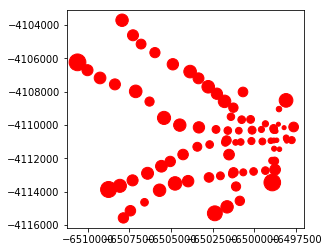

In [88]:
estaciones.plot(marker='.', color='red', markersize = estaciones['promedio']*10)

In [89]:
#hacemos una funcion para que haga todo

def verSubte(tipo_de_dia,hora):
    dt = leerData(tipo_de_dia, hora)
    estaciones = gpd.read_file('../carto/estaciones_de_subte.shp')
    estaciones.ID = estaciones.ID.map(int)
    estaciones = estaciones.merge(dt,on='ID',how='left')
    estaciones.plot(marker='.', color='red', markersize = estaciones['promedio']*10)

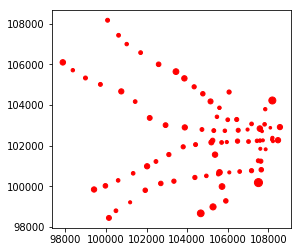

In [90]:
verSubte(hora = 8,tipo_de_dia = 'fin de semana')

In [91]:
lala = gpd.read_file('../carto/lineas_de_subte.shp')

In [92]:
lala

,id,Linea,geometry
0,1,A,LINESTRING (-58.46975741265597 -34.63057613832...
1,2,B,LINESTRING (-58.48656121515003 -34.57422942804...
2,3,C,LINESTRING (-58.38141172337224 -34.62732958019...
3,4,D,LINESTRING (-58.46196778708097 -34.55593795056...
4,5,E,LINESTRING (-58.46196701863403 -34.64345502880...
5,6,H,LINESTRING (-58.41256333829378 -34.64110314761...


In [93]:
def verSubteLindo(hora,tipo_de_dia,linea):
    import seaborn as sns
    #leo los datos de los molinetes
    dt = leerData(tipo_de_dia, hora)
    #lo la cartografia de las estaciones
    estaciones = gpd.read_file('../carto/estaciones_de_subte.shp')
    #estaciones = estaciones.to_crs(epsg=4326)
    #uno la cartografia con los datos
    estaciones.ID = estaciones.ID.map(int)
    estaciones = estaciones.merge(dt,on='ID',how='left')
    #leo una cartografia de fondo
    comunas = gpd.read_file('../carto/comunas.shp')
    #comunas = comunas.to_crs(epsg=4326)
    
    lineas = gpd.read_file('../carto/lineas_de_subte.shp')
    lineas = lineas.loc[lineas.Linea == linea,:]
    lineas = lineas.to_crs(estaciones.crs)

    estaciones['orden'] = estaciones.geometry.map(lambda estacion: lineas.project(estacion,normalized = True).iloc[0])
    
    #genero los ejes
    fig = plt.figure(figsize=(18,6))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    #la paleta de color
    colores = {
        'A':'lightblue',
        'B':'red',
        'C':'blue',
        'D':'green',
        'E':'purple',
        'H':'gold'
    }
    
    #ordeno las estaciones
    subdata = estaciones.loc[estaciones.LINEA==linea,:].sort_values(by='orden')
    
    #ploteo el mapa base
    comunas.plot(ax=ax1,alpha=0.5,color='grey')
    #ploteo estaciones de la linea seleccionada y las otras
    estaciones.plot(ax = ax1, marker='.', color='black', markersize = estaciones['promedio']*10,alpha=0.4)
    subdata.plot(ax = ax1, marker='.', color=colores[linea], markersize = subdata['promedio']*10,alpha=0.8)
    
    #elimino los ejes
    ax1.set_axis_off()
    
    #creo el bar plot
    sns.barplot(x="ESTACION", y="promedio", data=subdata,ax=ax2,color=colores[linea])
    
    #agrego etiquetas para eje x
    for tick in ax2.get_xticklabels():
        tick.set_rotation(70)
    
    #equiparo la proporcion
    ax1.axis('equal')

    



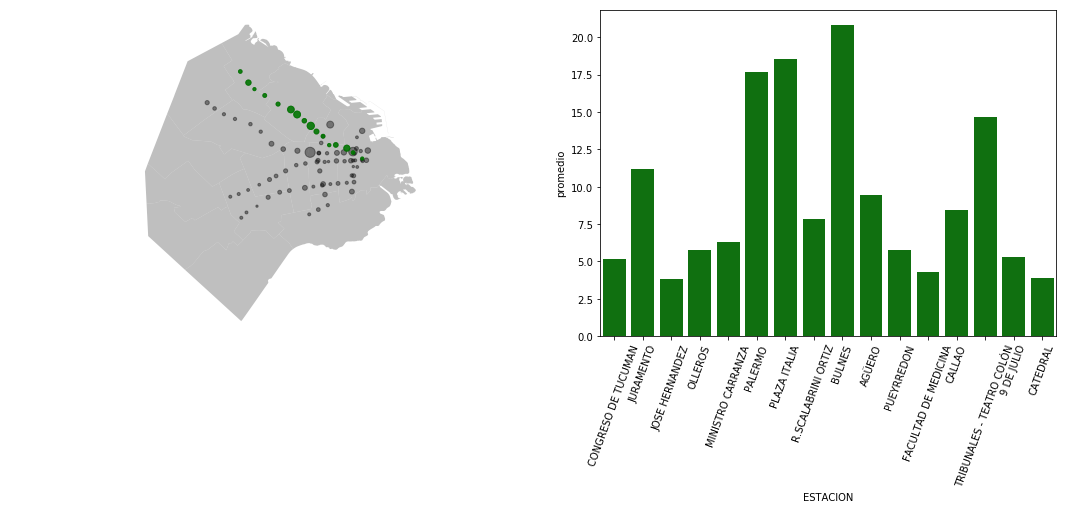

In [95]:
verSubteLindo(hora = 22,tipo_de_dia = 'fin de semana',linea = 'D')